# Tutorial 6 - Linear Regression among two variables
- Attempts to establish how X causes Y

### Correlation vs Linear Regression

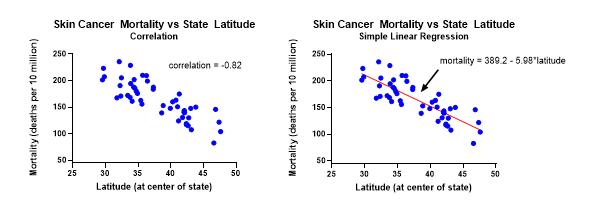

**Similarities:**
- Quantify the direction and strength of the relationship

**Differences:**
- Correlation is a single statistic
- Linear regression produces an equation

**Resources:**
1.	The difference betweencorrelati0onand linear regression. https://www.graphpad.com/support/faq/what-is-the-difference-between-correlation-and-linear-regression/
2.	Linear regression model in Python. https://www.kdnuggets.com/2019/03/beginners-guide-linear-regression-python-scikit-learn.html


In [2]:
#!pip install scikit-learn


In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib notebook

## Generate some random data by np.random.randn()

In [4]:
X = np.random.randn(50)
X.mean()
X.max(0)
X

array([ 4.98058532e-01, -1.17892499e+00, -6.18375904e-01, -3.78644322e-01,
        1.11769252e+00, -7.15353028e-01,  5.10633891e-01, -1.36887486e+00,
        2.49485125e-01,  2.17195785e+00,  6.62350731e-02, -2.12773755e-01,
        7.07104416e-01,  3.58939394e-01, -2.92103916e-01,  1.36544781e+00,
       -4.58361932e-01,  3.63335162e-01,  1.52459721e+00, -1.70781608e-01,
        8.48252402e-01,  1.24401048e+00, -6.88895949e-02,  2.66119260e-01,
       -7.40233654e-01,  6.29578488e-01,  4.62975360e-01,  1.06856538e+00,
        4.36185461e-01, -1.05198417e-03, -1.19810530e+00, -3.07613091e-01,
        8.15652041e-03,  1.68270072e+00,  6.20610705e-01,  8.48076139e-01,
        6.49988190e-01, -4.65899892e-01, -1.86545679e+00,  6.82867886e-02,
        8.91957240e-01, -9.35765683e-01, -1.31919817e-01,  6.71326964e-01,
       -2.45613377e-01,  1.12156912e-01, -2.19693097e-01, -1.82698827e+00,
        2.48467522e-02,  1.74818933e+00])

<IPython.core.display.Javascript object>


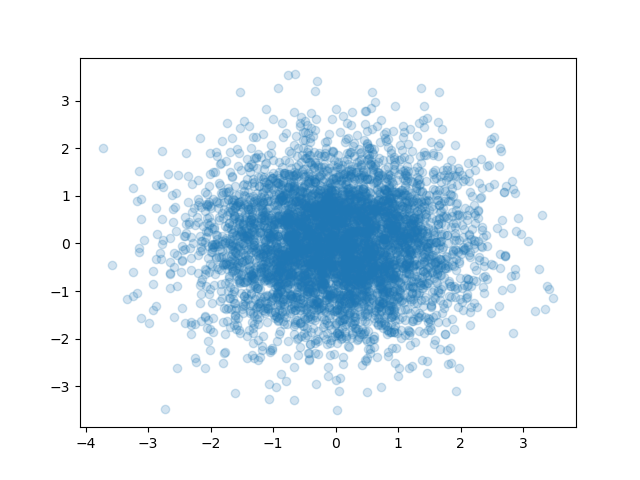

In [5]:
X = np.random.randn(5000)
Y = np.random.randn(5000)

fig, ax = plt.subplots()
ax.scatter(X, Y, alpha=.2)

## Calculate Liner Regression

In [26]:
tickers = ['AAPL', 'TWTR', 'IBM', 'MSFT', '^GSPC']
start = "2020-01-01"
end = "2020-12-31"

data = yf.download(tickers, start, end)

[*********************100%***********************]  5 of 5 completed


In [27]:
data = data['Adj Close']

In [28]:
data.head()

,AAPL,IBM,MSFT,TWTR,^GSPC
Date,,,,,
2020-01-02,73.449394,110.232513,155.761795,32.299999,3257.850098
2020-01-03,72.735321,109.353394,153.822327,31.520000,3234.850098
2020-01-06,73.314880,109.158020,154.219894,31.639999,3246.280029
2020-01-07,72.970078,109.231277,152.813782,32.540001,3237.179932
2020-01-08,74.143898,110.142952,155.247833,33.049999,3253.050049


In [29]:
log_returns = np.log(data/data.shift())

In [24]:
log_returns

,AAPL,IBM,MSFT,TWTR,^GSPC
Date,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN
2020-01-03,-0.009769,-0.008007,-0.012530,-0.024445,-0.007085
2020-01-06,0.007937,-0.001788,0.002582,0.003800,0.003527
2020-01-07,-0.004714,0.000671,-0.009160,0.028048,-0.002807
2020-01-08,0.015958,0.008312,0.015803,0.015551,0.004890
...,...,...,...,...,...
2023-02-13,0.018632,0.012823,0.030765,NaN,0.011384
2023-02-14,-0.004234,-0.009804,0.003128,NaN,-0.000280
2023-02-15,0.013808,0.002863,-0.008025,NaN,0.002769


In [30]:
def linear_regression(ticker_a, ticker_b):
    X = log_returns[ticker_a].iloc[1:].to_numpy().reshape(-1, 1)
    Y = log_returns[ticker_b].iloc[1:].to_numpy().reshape(-1, 1)

    lin_regr = LinearRegression()
    lin_regr.fit(X, Y)

    Y_pred = lin_regr.predict(X)

    alpha = lin_regr.intercept_[0]
    beta = lin_regr.coef_[0, 0]

    fig, ax = plt.subplots()
    ax.set_title("Alpha: " + str(round(alpha, 5)) + ", Beta: " + str(round(beta, 3)))
    
    # plot the X, Y returns
    ax.scatter(X, Y)
    # Plot line X and Y_pred
    ax.plot(X, Y_pred, c='r')

<IPython.core.display.Javascript object>


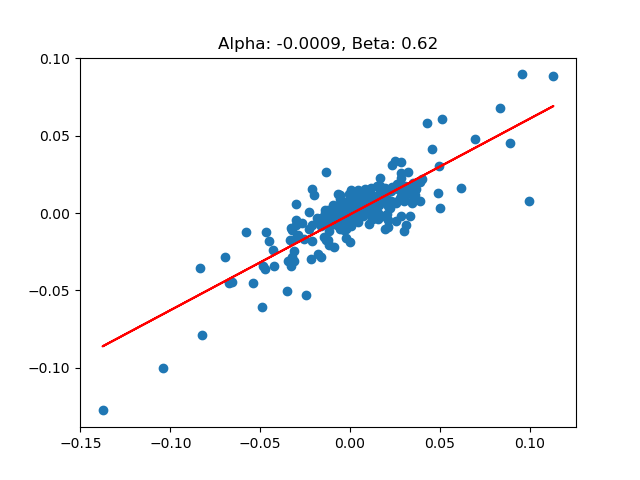

In [31]:
linear_regression("AAPL", "^GSPC")

<IPython.core.display.Javascript object>


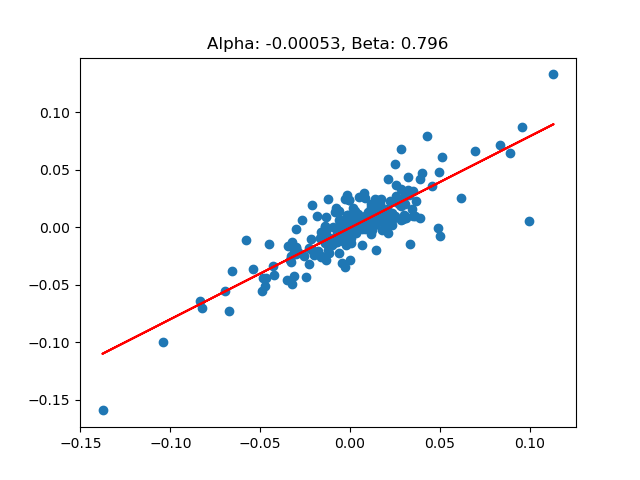

In [32]:
linear_regression("AAPL", "MSFT")

<IPython.core.display.Javascript object>


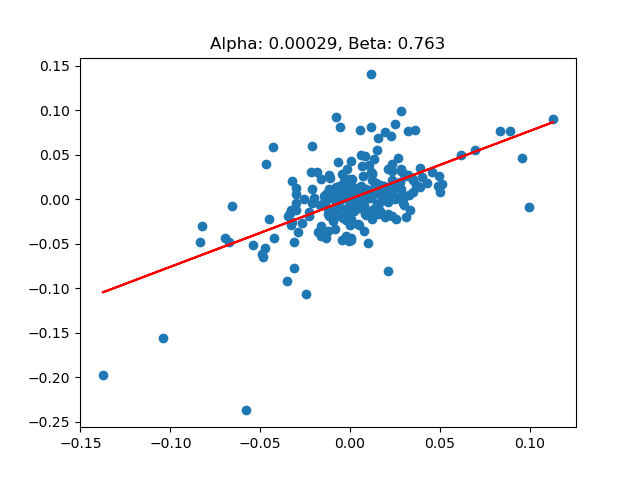

In [33]:
linear_regression("AAPL", "TWTR")

# END